C:\Temp\ipykernel_16152\4225719797.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Month'] = pd.Categorical(product_df['Month'], categories=months_order, ordered=True)
C:\Temp\ipykernel_16152\4225719797.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Month'] = pd.Categorical(product_df['Month'], categories=months_order, ordered=True)
C:\Temp\ipykernel_16152\4225719797.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

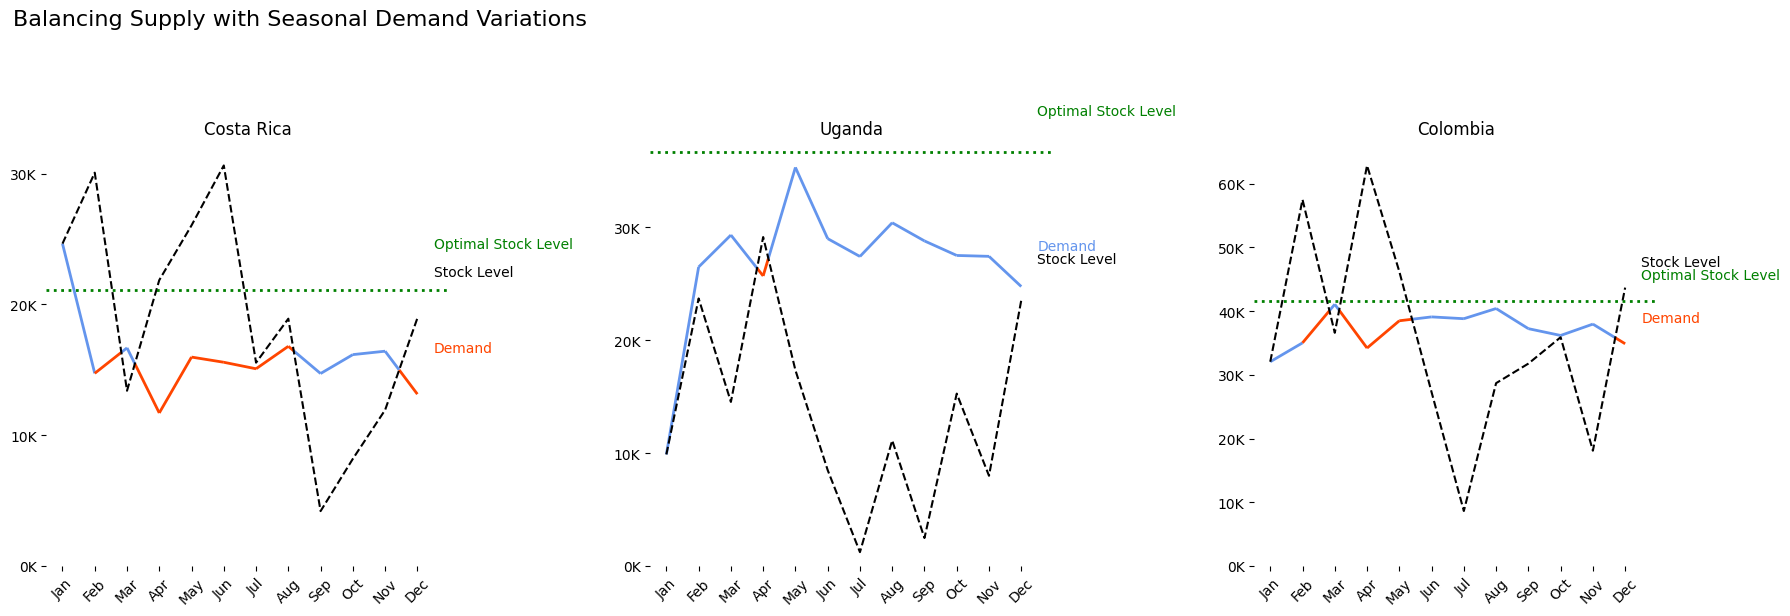

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import re
from io import StringIO
import calendar
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator

# Multiline string containing your data
data = '''
Product\tSupplier\tMonth\tStock level\tUnit\tScrapped\tReasoncode\tUnit price\tStock value\tPurchased\tDemand
Coffee Beans (COO Costa Rica)\tOscar Amador\tJanuary\t24647\tKg\t-\t\t€ 11,50\t€ 283440,50\t20160\t24647 
Coffee Beans (COO Costa Rica)\tOscar Amador\tFebruary\t30076\tKg\t-\t\t€ 11,50\t€ 345874,00\t20160\t14731
Coffee Beans (COO Costa Rica)\tOscar Amador\tMarch\t13399\tKg\t-\t\t€ 11,50\t€ 154088,50\t-\t16677
Coffee Beans (COO Costa Rica)\tOscar Amador\tApril\t21858\tKg\t-\t\t€ 11,50\t€ 251367,00\t20160\t11701
Coffee Beans (COO Costa Rica)\tOscar Amador\tMay\t26044\tKg\t-\t\t€ 11,50\t€ 299506,00\t20160\t15974
Coffee Beans (COO Costa Rica)\tOscar Amador\tJune\t30627\tKg\t-\t\t€ 11,50\t€ 352210,50\t20160\t15577
Coffee Beans (COO Costa Rica)\tOscar Amador\tJuly\t15548\tKg\t-\t\t€ 11,50\t€ 178802,00\t-\t15079
Coffee Beans (COO Costa Rica)\tOscar Amador\tAugust\t18910\tKg\t-\t\t€ 11,50\t€ 217465,00\t20160\t16798
Coffee Beans (COO Costa Rica)\tOscar Amador\tSeptember\t4194\tKg\t-\t\t€ 11,50\t€ 48231,00\t-\t14716
Coffee Beans (COO Costa Rica)\tOscar Amador\tOctober\t8192\tKg\t-\t\t€ 11,50\t€ 94208,00\t20160\t16162
Coffee Beans (COO Costa Rica)\tOscar Amador\tNovember\t11928\tKg\t-\t\t€ 11,50\t€ 137172,00\t20160\t16424
Coffee Beans (COO Costa Rica)\tOscar Amador\tDecember\t18949\tKg\t-\t\t€ 11,50\t€ 217913,50\t20160\t13139
Coffee Beans (COO Uganda)\tKabaka Obote\tJanuary\t9887\tKg\t-\t\t€ 8,50\t€ 84039,50\t20160\t9887
Coffee Beans (COO Uganda)\tKabaka Obote\tFebruary\t23710\tKg\t-\t\t€ 8,50\t€ 201535,00\t40320\t26497
Coffee Beans (COO Uganda)\tKabaka Obote\tMarch\t14539\tKg\t-\t\t€ 8,50\t€ 123581,50\t20160\t29331
Coffee Beans (COO Uganda)\tKabaka Obote\tApril\t29154\tKg\t-\t\t€ 8,50\t€ 247809,00\t40320\t25705
Coffee Beans (COO Uganda)\tKabaka Obote\tMay\t17349\tKg\t-3360\tEXP\t€ 8,50\t€ 147466,50\t20160\t35325
Coffee Beans (COO Uganda)\tKabaka Obote\tJune\t8497\tKg\t-\t\t€ 8,50\t€ 72224,50\t20160\t29012
Coffee Beans (COO Uganda)\tKabaka Obote\tJuly\t1226\tKg\t-\t\t€ 8,50\t€ 10421,00\t20160\t27431
Coffee Beans (COO Uganda)\tKabaka Obote\tAugust\t11126\tKg\t-\t\t€ 8,50\t€ 94571,00\t40320\t30420
Coffee Beans (COO Uganda)\tKabaka Obote\tSeptember\t2477\tKg\t-\t\t€ 8,50\t€ 21054,50\t20160\t28809
Coffee Beans (COO Uganda)\tKabaka Obote\tOctober\t15276\tKg\t-\t\t€ 8,50\t€ 129846,00\t40320\t27521
Coffee Beans (COO Uganda)\tKabaka Obote\tNovember\t7993\tKg\t-\t\t€ 8,50\t€ 67940,50\t20160\t27443
Coffee Beans (COO Uganda)\tKabaka Obote\tDecember\t23547\tKg\t-\t\t€ 8,50\t€ 200149,50\t40320\t24766
Coffee Beans (COO Colombia)\tPablo Rodriguez\tJanuary\t32057\tKg\t-\t\t€ 6,95\t€ 222796,15\t40320\t32057
Coffee Beans (COO Colombia)\tPablo Rodriguez\tFebruary\t57513\tKg\t-\t\t€ 6,95\t€ 399715,35\t60480\t35024
Coffee Beans (COO Colombia)\tPablo Rodriguez\tMarch\t36599\tKg\t-\t\t€ 6,95\t€ 254363,05\t20160\t41074
Coffee Beans (COO Colombia)\tPablo Rodriguez\tApril\t62871\tKg\t-\t\t€ 6,95\t€ 436953,45\t60480\t34208
Coffee Beans (COO Colombia)\tPablo Rodriguez\tMay\t46222\tKg\t-1680\tEXP\t€ 6,95\t€ 321242,90\t20160\t38489
Coffee Beans (COO Colombia)\tPablo Rodriguez\tJune\t27284\tKg\t-\t\t€ 6,95\t€ 189623,80\t20160\t39098
Coffee Beans (COO Colombia)\tPablo Rodriguez\tJuly\t8629\tKg\t-\t\t€ 6,95\t€ 59971,55\t20160\t38815
Coffee Beans (COO Colombia)\tPablo Rodriguez\tAugust\t28697\tKg\t-\t\t€ 6,95\t€ 199444,15\t60480\t40412
Coffee Beans (COO Colombia)\tPablo Rodriguez\tSeptember\t31765\tKg\t-\t\t€ 6,95\t€ 220766,75\t40320\t37252
Coffee Beans (COO Colombia)\tPablo Rodriguez\tOctober\t35901\tKg\t-\t\t€ 6,95\t€ 249511,95\t40320\t36184
Coffee Beans (COO Colombia)\tPablo Rodriguez\tNovember\t18094\tKg\t-\t\t€ 6,95\t€ 125753,30\t20160\t37967
Coffee Beans (COO Colombia)\tPablo Rodriguez\tDecember\t43694\tKg\t-\t\t€ 6,95\t€ 303673,30\t60480\t34880
'''

# Read data into DataFrame
df = pd.read_csv(StringIO(data), sep='\t', engine='python')

# Clean numeric columns
numeric_columns = ['Stock level', 'Scrapped', 'Unit price', 'Stock value', 'Purchased', 'Demand']
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(r'[^-\d.,]', '', regex=True)
    df[col] = df[col].str.replace(',', '.')
    df[col] = df[col].replace({'': '0', '-': '0'})  # Replace '-' with '0'
    df[col] = df[col].astype(float)

# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Function to abbreviate month names
def abbreviate_month(month_name):
    try:
        month_num = list(calendar.month_name).index(month_name)
        return calendar.month_abbr[month_num]
    except ValueError:
        return month_name  # Return original name if not found

# Function to plot Demand vs Stock Level
def plot_demand_vs_stock(product_df, product_name, ax):
    # Sort data by months
    product_df['Month'] = pd.Categorical(product_df['Month'], categories=months_order, ordered=True)
    product_df = product_df.sort_values('Month')

    # Numerical values for X-axis
    x = np.arange(len(product_df))

    demand = product_df['Demand'].values
    stock_level = product_df['Stock level'].values

    # Initialize lists for line segments and their colors
    segments = []
    colors = []

    # Loop through data points to create segments
    for i in range(len(demand) - 1):
        x0, x1 = x[i], x[i+1]
        y0_demand, y1_demand = demand[i], demand[i+1]
        y0_stock, y1_stock = stock_level[i], stock_level[i+1]

        # Check if Demand and Stock Level lines intersect between these points
        if (y0_demand - y0_stock) * (y1_demand - y1_stock) >= 0:
            # No intersection; use single color for the segment
            segments.append([[x0, y0_demand], [x1, y1_demand]])
            color = 'cornflowerblue' if y0_demand >= y0_stock else 'orangered'
            colors.append(color)
        else:
            # Lines intersect; calculate intersection point
            m_demand = (y1_demand - y0_demand) / (x1 - x0)
            m_stock = (y1_stock - y0_stock) / (x1 - x0)
            if m_demand == m_stock:
                x_cross = x0
                y_cross = y0_demand
            else:
                x_cross = x0 + (y0_stock - y0_demand) / (m_demand - m_stock)
                y_cross = m_demand * (x_cross - x0) + y0_demand

            # Segment before intersection
            segments.append([[x0, y0_demand], [x_cross, y_cross]])
            color = 'cornflowerblue' if y0_demand >= y0_stock else 'orangered'
            colors.append(color)

            # Segment after intersection
            segments.append([[x_cross, y_cross], [x1, y1_demand]])
            color = 'cornflowerblue' if y1_demand >= y1_stock else 'orangered'
            colors.append(color)

    # Create LineCollection with segments and colors
    lc = LineCollection(segments, colors=colors, linewidths=2)
    ax.add_collection(lc)

    # Plot Stock Level line
    ax.plot(x, stock_level, color='black', linestyle='--', label='Stock Level')

    # Calculate Optimal Stock Level using 95% Service Level
    Z = 1.645  # Z-score for 95% service level
    demand_values = product_df['Demand'].values
    mean_demand = np.mean(demand_values)
    std_demand = np.std(demand_values, ddof=1)  # Sample standard deviation
    lead_time = 1  # Assuming lead time is 1 month
    safety_stock = Z * std_demand * np.sqrt(lead_time)
    optimal_stock_level = mean_demand + safety_stock

    # Plot the optimal stock level line
    ax.axhline(optimal_stock_level, color='green', linestyle=':', linewidth=2, label='Optimal Stock Level')

    # Plot zero line if there are negative Demand values
    if demand.min() < 0:
        ax.axhline(0, color='grey', linestyle=':', linewidth=1)
        # Highlight points with negative Demand
        negative_indices = np.where(demand < 0)[0]
        dot_colors = ['cornflowerblue' if demand[idx] >= stock_level[idx] else 'orangered' for idx in negative_indices]
        ax.scatter(x[negative_indices], demand[negative_indices], color=dot_colors, marker='o')
        # Add labels to negative Demand points
        for idx in negative_indices:
            ax.text(x[idx] - 0.2, demand[idx], f'{int(demand[idx])}', color='black', fontsize=8, ha='right', va='center')

    # Set X-axis with abbreviated month names
    abbreviated_months = product_df['Month'].apply(abbreviate_month)
    ax.set_xticks(x)
    ax.set_xticklabels(abbreviated_months, rotation=45)

    # Format Y-axis: ticks every 10K and start from 0
    ax.yaxis.set_major_locator(MultipleLocator(10000))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))
    ax.set_ylim(bottom=0)  # Start Y-axis at 0

    # Extract country name from product name
    match = re.search(r'\(COO (.+?)\)', product_name)
    if match:
        country_name = match.group(1)
    else:
        country_name = product_name  # Use full product name if pattern doesn't match

    # Set subplot title to country name only
    ax.set_title(f'{country_name}', fontsize=12, pad=10)

    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove plot frame
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels at the end of the lines with adjusted positions
    label_offset = 0.5  # Horizontal offset for labels
    vertical_spacing = 3000  # Vertical spacing between line and label

    # Demand label
    ax.text(x[-1] + label_offset, demand[-1] + vertical_spacing, 'Demand', va='bottom', ha='left',
            color='cornflowerblue' if demand[-1] >= stock_level[-1] else 'orangered')

    # Stock Level label
    ax.text(x[-1] + label_offset, stock_level[-1] + vertical_spacing, 'Stock Level', va='bottom', ha='left', color='black')

    # Optimal Stock Level label
    ax.text(x[-1] + label_offset, optimal_stock_level + vertical_spacing, 'Optimal Stock Level', va='bottom', ha='left', color='green')

    # Set X-axis limits
    ax.set_xlim(-0.5, len(x) - 0.5 + label_offset)

# Filter data for Coffee Beans only
df_beans = df[df['Product'].str.contains('Coffee Beans')]

# Get list of unique Coffee Beans products
products = df_beans['Product'].unique()

# Determine the number of products
num_products = len(products)

# Check if there are products to plot
if num_products == 0:
    print("No data available to plot.")
else:
    # Define number of columns and rows for subplots
    cols = 3  # Adjust the number of columns as needed
    rows = max(1, (num_products + cols - 1) // cols)  # Ensure at least one row

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), sharey=False)

    # Flatten axes array for easy iteration
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    # Plot each product
    for ax, product in zip(axes, products):
        product_df = df_beans[df_beans['Product'] == product]
        plot_demand_vs_stock(product_df, product, ax)

    # Remove unused subplots
    for ax in axes[len(products):]:
        fig.delaxes(ax)

    # Set main title
    fig.suptitle('Balancing Supply with Seasonal Demand Variations', fontsize=16, x=0.01, y=1.02, ha='left')

    # Adjust layout to add space between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95], w_pad=3, h_pad=3)

    # Display the plot
    plt.show()


In [47]:
## Costa Rica 
#There is a noticeable drop in stock levels around October, but demand remains steady, highlighting a potential risk of supply shortage;
#Peacks of stock level represent a wastage of capacity and holding costs;
#stock level in this case scenario should be lowered to as close to 0 level with certain buffer.

## Uganda
#The stock level sharply decreases from May onward, leading to a significant supply gap during the later months of the year, suggesting potential supply constraints;
#Demand fluctuates more significantly compared to stock levels, with high demand periods in April and May.

## Colombia
#The stock levels generally exceed demand throughout the year, but there is a closer alignment between the two in April and June;
#A sharp decrease in stock levels occurs around August, which coincides with stable demand, indicating a potential imbalance in supply planning during this period;
#Peaks in February and April of stock level represent poor turnover and organization of WH.

